In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, SpatialDropout1D, Embedding, Flatten, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive
import time


In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Light

In [ ]:
def readText(fileName):
  f = open(fileName, 'r')
  text = f.read()
  text = text.replace('\n', ' ')
  return text
className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"]
nClasses = len(className)

In [ ]:
trainText = []
testText = []

for i in className:
  for j in os.listdir('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/'):
    if i in j:
      if 'Обучающая' in j:
        trainText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/'+j))
        print(j, 'добавлен в обучающую выборку')
      if 'Тестовая' in j:
        testText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/'+j))
        print(j, 'добавлен в тестовую выборку')


(О. Генри) Обучающая_50 вместе.txt добавлен в обучающую выборку
(О. Генри) Тестовая_20 вместе.txt добавлен в тестовую выборку
(Стругацкие) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Стругацкие) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Булгаков) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Булгаков) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Клиффорд_Саймак) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Клиффорд_Саймак) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Макс Фрай) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Макс Фрай) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Рэй Брэдберри) Обучающая_22 вместе.txt добавлен в обучающую выборку
(Рэй Брэдберри) Тестовая_8 вместе.txt добавлен в тестовую выборку


In [ ]:
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index +=step
  return xSample

In [ ]:
def createSetMultiClasses(wordIndexes, xLen, step):
  nClasses = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step))
  
  xSamples = []
  ySamples = []

  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasses))

  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)

  return (xSamples, ySamples)

In [ ]:
def fit_model01(maxWordCount, xLen, step):
  '''
  функция для подставления разных значений maxWordCount при формировании обучающей/валидационной выборок и при обучении модели
  '''
  maxWordCount = maxWordCount
  tokenizer = Tokenizer(num_words=maxWordCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
  tokenizer.fit_on_texts(trainText)
  trainWordIndexes = tokenizer.texts_to_sequences(trainText)
  testWordIndexes = tokenizer.texts_to_sequences(testText)
  xLen = xLen
  step = step

  xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
  xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)
  xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
  xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())
  # добавил удаление переменных, которые для задания лайт не понадабятся в дальнейшем
  # чтобы можно было запустить модель с 50000 maxWordCount
  del xTest
  del testWordIndexes
  del trainWordIndexes
  model01 = Sequential()
  model01.add(Dense(200, input_dim = maxWordCount, activation='relu'))
  model01.add(Dropout(0.25))
  model01.add(BatchNormalization())
  model01.add(Dense(6, activation='sigmoid'))

  model01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  history = model01.fit(xTrain01, yTrain,
                        epochs=10,
                        batch_size=128,
                        validation_data=(xTest01, yTest))
  plt.plot(history.history['accuracy'], 
          label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

## 1

### а. 100 maxWordsCount

Epoch 1/10
138/138 [==============================] - 1s 5ms/step - loss: 1.2894 - accuracy: 0.5615 - val_loss: 1.3420 - val_accuracy: 0.4936
Epoch 2/10
138/138 [==============================] - 1s 4ms/step - loss: 0.8914 - accuracy: 0.6833 - val_loss: 1.2525 - val_accuracy: 0.5242
Epoch 3/10
138/138 [==============================] - 1s 4ms/step - loss: 0.7359 - accuracy: 0.7232 - val_loss: 1.3441 - val_accuracy: 0.5121
Epoch 4/10
138/138 [==============================] - 1s 4ms/step - loss: 0.6447 - accuracy: 0.7628 - val_loss: 1.3750 - val_accuracy: 0.5230
Epoch 5/10
138/138 [==============================] - 1s 4ms/step - loss: 0.5873 - accuracy: 0.7829 - val_loss: 1.4464 - val_accuracy: 0.5123
Epoch 6/10
138/138 [==============================] - 1s 4ms/step - loss: 0.5325 - accuracy: 0.8029 - val_loss: 1.5569 - val_accuracy: 0.4994
Epoch 7/10
138/138 [==============================] - 1s 4ms/step - loss: 0.5060 - accuracy: 0.8139 - val_loss: 1.5491 - val_accuracy: 0.5093
Epoch 

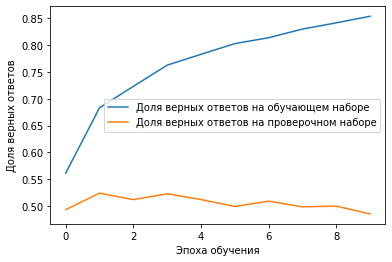

In [ ]:
# maxWordCount = 100
fit_model01(maxWordCount=100, xLen=1000, step=100)

### b. 1000 maxWordsCount

Epoch 1/10
138/138 [==============================] - 1s 5ms/step - loss: 0.7580 - accuracy: 0.8993 - val_loss: 0.7592 - val_accuracy: 0.7390
Epoch 2/10
138/138 [==============================] - 1s 4ms/step - loss: 0.1427 - accuracy: 0.9705 - val_loss: 0.4917 - val_accuracy: 0.8278
Epoch 3/10
138/138 [==============================] - 1s 4ms/step - loss: 0.0203 - accuracy: 0.9991 - val_loss: 0.5307 - val_accuracy: 0.8180
Epoch 4/10
138/138 [==============================] - 1s 4ms/step - loss: 0.0055 - accuracy: 0.9999 - val_loss: 0.4733 - val_accuracy: 0.8367
Epoch 5/10
138/138 [==============================] - 1s 4ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.5077 - val_accuracy: 0.8265
Epoch 6/10
138/138 [==============================] - 1s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.5105 - val_accuracy: 0.8311
Epoch 7/10
138/138 [==============================] - 1s 4ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5070 - val_accuracy: 0.8331
Epoch 

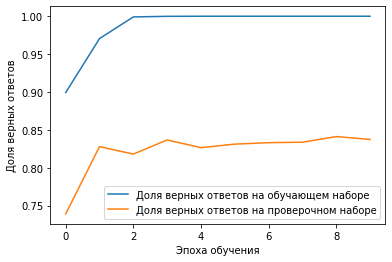

In [ ]:
# 1000
fit_model01(maxWordCount=1000, xLen=1000, step=100)

### c. 10000 maxWordsCount

Epoch 1/10
138/138 [==============================] - 1s 9ms/step - loss: 0.4180 - accuracy: 0.9591 - val_loss: 0.6153 - val_accuracy: 0.8415
Epoch 2/10
138/138 [==============================] - 1s 7ms/step - loss: 0.1044 - accuracy: 0.9515 - val_loss: 0.4808 - val_accuracy: 0.8335
Epoch 3/10
138/138 [==============================] - 1s 7ms/step - loss: 0.0755 - accuracy: 0.9557 - val_loss: 0.4200 - val_accuracy: 0.8507
Epoch 4/10
138/138 [==============================] - 1s 7ms/step - loss: 0.0649 - accuracy: 0.9585 - val_loss: 0.4513 - val_accuracy: 0.8383
Epoch 5/10
138/138 [==============================] - 1s 7ms/step - loss: 0.0600 - accuracy: 0.9621 - val_loss: 0.4273 - val_accuracy: 0.8482
Epoch 6/10
138/138 [==============================] - 1s 7ms/step - loss: 0.0452 - accuracy: 0.9759 - val_loss: 0.2702 - val_accuracy: 0.9034
Epoch 7/10
138/138 [==============================] - 1s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.3647 - val_accuracy: 0.8750
Epoch 

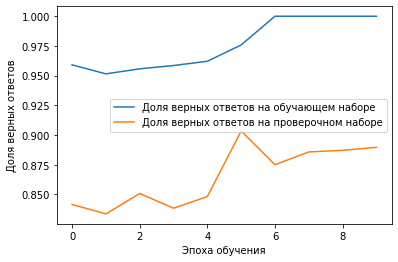

In [ ]:
fit_model01(maxWordCount=10000, xLen=1000, step=100)

### d. 50000 maxWordsCount

Epoch 1/10
69/69 [==============================] - 11s 162ms/step - loss: 0.5208 - accuracy: 0.9778 - val_loss: 0.7336 - val_accuracy: 0.8944
Epoch 2/10
69/69 [==============================] - 11s 154ms/step - loss: 0.1960 - accuracy: 0.9601 - val_loss: 0.6081 - val_accuracy: 0.8944
Epoch 3/10
69/69 [==============================] - 11s 154ms/step - loss: 0.1167 - accuracy: 0.9470 - val_loss: 0.4980 - val_accuracy: 0.8977
Epoch 4/10
69/69 [==============================] - 11s 154ms/step - loss: 0.0804 - accuracy: 0.9470 - val_loss: 0.3856 - val_accuracy: 0.9297
Epoch 5/10
69/69 [==============================] - 11s 154ms/step - loss: 0.0620 - accuracy: 0.9506 - val_loss: 0.3367 - val_accuracy: 0.9228
Epoch 6/10
69/69 [==============================] - 11s 155ms/step - loss: 0.0495 - accuracy: 0.9628 - val_loss: 0.2870 - val_accuracy: 0.9240
Epoch 7/10
69/69 [==============================] - 11s 154ms/step - loss: 0.0396 - accuracy: 0.9771 - val_loss: 0.2351 - val_accuracy: 0.9369

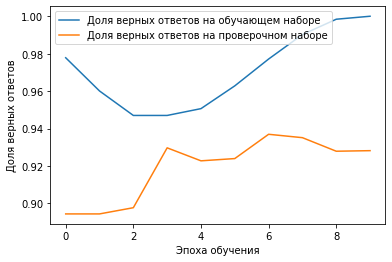

In [ ]:
# оперативки на 50000 не хватило, пришлось увеличить шаг и окно
fit_model01(maxWordCount=50000, xLen=2000, step=200)

## 2

### e. Поменять количество нейронов

Epoch 1/10
138/138 [==============================] - 2s 16ms/step - loss: 0.2420 - accuracy: 0.9504 - val_loss: 0.5301 - val_accuracy: 0.9014
Epoch 2/10
138/138 [==============================] - 2s 14ms/step - loss: 0.0472 - accuracy: 0.9671 - val_loss: 0.3961 - val_accuracy: 0.8926
Epoch 3/10
138/138 [==============================] - 2s 14ms/step - loss: 0.0085 - accuracy: 0.9967 - val_loss: 0.3479 - val_accuracy: 0.8968
Epoch 4/10
138/138 [==============================] - 2s 14ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3293 - val_accuracy: 0.8980
Epoch 5/10
138/138 [==============================] - 2s 14ms/step - loss: 6.9871e-04 - accuracy: 1.0000 - val_loss: 0.3228 - val_accuracy: 0.8999
Epoch 6/10
138/138 [==============================] - 2s 14ms/step - loss: 4.3862e-04 - accuracy: 1.0000 - val_loss: 0.3170 - val_accuracy: 0.9004
Epoch 7/10
138/138 [==============================] - 2s 14ms/step - loss: 2.5921e-04 - accuracy: 1.0000 - val_loss: 0.3217 - val_accu

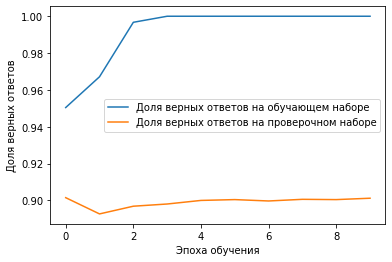

In [ ]:
# сделал 1000 нейронов
maxWordCount = 20000
tokenizer = Tokenizer(num_words=maxWordCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)
xLen = 1000
step = 100

xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

model01 = Sequential()
model01.add(Dense(1000, input_dim = maxWordCount, activation='relu'))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model01.fit(xTrain01, yTrain,
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest01, yTest))
plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### f. Поменять количество слоев

Epoch 1/10
138/138 [==============================] - 2s 15ms/step - loss: 0.8612 - accuracy: 0.9287 - val_loss: 0.7699 - val_accuracy: 0.8627
Epoch 2/10
138/138 [==============================] - 2s 13ms/step - loss: 0.3360 - accuracy: 0.9584 - val_loss: 0.3873 - val_accuracy: 0.8620
Epoch 3/10
138/138 [==============================] - 2s 13ms/step - loss: 0.1721 - accuracy: 0.9578 - val_loss: 0.3733 - val_accuracy: 0.8522
Epoch 4/10
138/138 [==============================] - 2s 13ms/step - loss: 0.1454 - accuracy: 0.9554 - val_loss: 0.3970 - val_accuracy: 0.8430
Epoch 5/10
138/138 [==============================] - 2s 13ms/step - loss: 0.1369 - accuracy: 0.9539 - val_loss: 0.4198 - val_accuracy: 0.8482
Epoch 6/10
138/138 [==============================] - 2s 13ms/step - loss: 0.1328 - accuracy: 0.9552 - val_loss: 0.3952 - val_accuracy: 0.8548
Epoch 7/10
138/138 [==============================] - 2s 13ms/step - loss: 0.1303 - accuracy: 0.9559 - val_loss: 0.3911 - val_accuracy: 0.8554

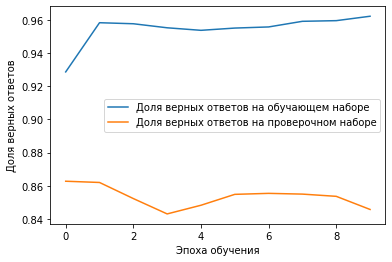

In [ ]:
# добавил два Dense слоя
maxWordCount = 20000
tokenizer = Tokenizer(num_words=maxWordCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)
xLen = 1000
step = 100

xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

model01 = Sequential()
model01.add(Dense(200, input_dim = maxWordCount, activation='relu'))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(100, activation='relu'))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(50, activation='relu'))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model01.fit(xTrain01, yTrain,
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest01, yTest))
plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### g. Поменять активационные функции

Epoch 1/10
138/138 [==============================] - 2s 14ms/step - loss: 0.3883 - accuracy: 0.9823 - val_loss: 0.4657 - val_accuracy: 0.8507
Epoch 2/10
138/138 [==============================] - 2s 11ms/step - loss: 0.1156 - accuracy: 0.9993 - val_loss: 0.4357 - val_accuracy: 0.8433
Epoch 3/10
138/138 [==============================] - 2s 12ms/step - loss: 0.1077 - accuracy: 0.9989 - val_loss: 0.4352 - val_accuracy: 0.8459
Epoch 4/10
138/138 [==============================] - 2s 11ms/step - loss: 0.1055 - accuracy: 0.9993 - val_loss: 0.4338 - val_accuracy: 0.8524
Epoch 5/10
138/138 [==============================] - 2s 12ms/step - loss: 0.1043 - accuracy: 0.9995 - val_loss: 0.4386 - val_accuracy: 0.8678
Epoch 6/10
138/138 [==============================] - 2s 11ms/step - loss: 0.1029 - accuracy: 0.9998 - val_loss: 0.4172 - val_accuracy: 0.9197
Epoch 7/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.3182 - val_accuracy: 0.9282

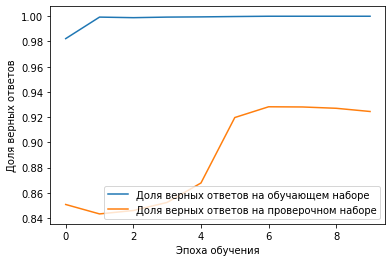

In [ ]:
# поменял релу на танг
maxWordCount = 20000
tokenizer = Tokenizer(num_words=maxWordCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)
xLen = 1000
step = 100

xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

model01 = Sequential()
model01.add(Dense(200, input_dim = maxWordCount, activation='tanh'))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(100, activation='tanh'))
model01.add(Dropout(0.25))
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model01.fit(xTrain01, yTrain,
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest01, yTest))
plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/10
138/138 [==============================] - 2s 14ms/step - loss: 0.2292 - accuracy: 0.9816 - val_loss: 0.3979 - val_accuracy: 0.9059
Epoch 2/10
138/138 [==============================] - 2s 12ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3963 - val_accuracy: 0.9011
Epoch 3/10
138/138 [==============================] - 2s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3865 - val_accuracy: 0.8998
Epoch 4/10
138/138 [==============================] - 2s 11ms/step - loss: 6.0681e-04 - accuracy: 1.0000 - val_loss: 0.3936 - val_accuracy: 0.9041
Epoch 5/10
138/138 [==============================] - 2s 12ms/step - loss: 4.4410e-04 - accuracy: 1.0000 - val_loss: 0.3869 - val_accuracy: 0.8990
Epoch 6/10
138/138 [==============================] - 2s 12ms/step - loss: 3.1918e-04 - accuracy: 1.0000 - val_loss: 0.3846 - val_accuracy: 0.9013
Epoch 7/10
138/138 [==============================] - 2s 11ms/step - loss: 2.3499e-04 - accuracy: 1.0000 - val_loss: 0.4008 - val_

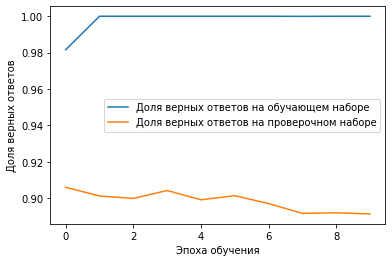

In [ ]:
# поменял релу на selu
maxWordCount = 20000
tokenizer = Tokenizer(num_words=maxWordCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)
xLen = 1000
step = 100

xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())

model01 = Sequential()
model01.add(Dense(200, input_dim = maxWordCount, activation='selu'))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(100, activation='selu'))
model01.add(Dropout(0.25))
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model01.fit(xTrain01, yTrain,
                      epochs=10,
                      batch_size=128,
                      validation_data=(xTest01, yTest))
plt.plot(history.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
maxWordCount = 50000
tokenizer = Tokenizer(num_words=maxWordCount, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)
xLen = 1000
step = 100

xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())


## 3

Epoch 1/10
138/138 [==============================] - 4s 28ms/step - loss: 1.0516 - accuracy: 0.6602 - val_loss: 2.4929 - val_accuracy: 0.2929
Epoch 2/10
138/138 [==============================] - 4s 26ms/step - loss: 0.3674 - accuracy: 0.8550 - val_loss: 3.4877 - val_accuracy: 0.2929
Epoch 3/10
138/138 [==============================] - 4s 26ms/step - loss: 0.1481 - accuracy: 0.8604 - val_loss: 2.2555 - val_accuracy: 0.3253
Epoch 4/10
138/138 [==============================] - 4s 26ms/step - loss: 0.1113 - accuracy: 0.8549 - val_loss: 1.8258 - val_accuracy: 0.4657
Epoch 5/10
138/138 [==============================] - 4s 26ms/step - loss: 0.1072 - accuracy: 0.8564 - val_loss: 1.4791 - val_accuracy: 0.5615
Epoch 6/10
138/138 [==============================] - 4s 27ms/step - loss: 0.1052 - accuracy: 0.8569 - val_loss: 1.4765 - val_accuracy: 0.5909
Epoch 7/10
138/138 [==============================] - 4s 26ms/step - loss: 0.1041 - accuracy: 0.8558 - val_loss: 1.4530 - val_accuracy: 0.6011

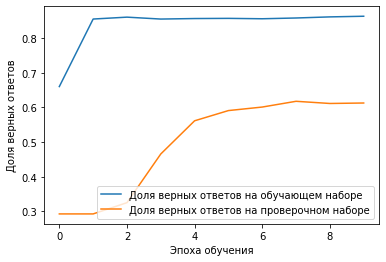

In [ ]:
# Контрольный замер
modelE = Sequential()
modelE.add(Embedding(maxWordCount, 20, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.2))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=10,
                    batch_size=128,
                    validation_data=(xTest, yTest))


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### h. 10 Embedding

Epoch 1/10
138/138 [==============================] - 2s 18ms/step - loss: 1.1616 - accuracy: 0.6307 - val_loss: 1.8859 - val_accuracy: 0.2929
Epoch 2/10
138/138 [==============================] - 2s 18ms/step - loss: 0.3950 - accuracy: 0.8979 - val_loss: 2.8792 - val_accuracy: 0.2929
Epoch 3/10
138/138 [==============================] - 2s 16ms/step - loss: 0.1574 - accuracy: 0.8790 - val_loss: 2.0579 - val_accuracy: 0.3177
Epoch 4/10
138/138 [==============================] - 2s 17ms/step - loss: 0.1160 - accuracy: 0.9119 - val_loss: 1.3700 - val_accuracy: 0.4313
Epoch 5/10
138/138 [==============================] - 2s 17ms/step - loss: 0.0604 - accuracy: 0.9803 - val_loss: 1.1739 - val_accuracy: 0.5652
Epoch 6/10
138/138 [==============================] - 2s 16ms/step - loss: 0.0076 - accuracy: 0.9990 - val_loss: 1.0207 - val_accuracy: 0.6452
Epoch 7/10
138/138 [==============================] - 2s 17ms/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 1.1067 - val_accuracy: 0.6351

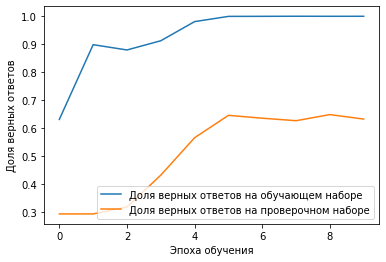

In [ ]:
# 10 Embedding
modelE = Sequential()
modelE.add(Embedding(maxWordCount, 10, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.2))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=10,
                    batch_size=128,
                    validation_data=(xTest, yTest))


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### i. 50 Embedding

Epoch 1/10
138/138 [==============================] - 8s 58ms/step - loss: 0.9803 - accuracy: 0.7240 - val_loss: 2.7507 - val_accuracy: 0.2937
Epoch 2/10
138/138 [==============================] - 8s 56ms/step - loss: 0.2885 - accuracy: 0.9467 - val_loss: 3.0761 - val_accuracy: 0.2929
Epoch 3/10
138/138 [==============================] - 8s 56ms/step - loss: 0.0688 - accuracy: 0.9735 - val_loss: 2.0767 - val_accuracy: 0.3243
Epoch 4/10
138/138 [==============================] - 8s 56ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 1.5052 - val_accuracy: 0.4251
Epoch 5/10
138/138 [==============================] - 8s 56ms/step - loss: 0.0046 - accuracy: 0.9999 - val_loss: 1.2533 - val_accuracy: 0.5464
Epoch 6/10
138/138 [==============================] - 8s 57ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.2841 - val_accuracy: 0.5704
Epoch 7/10
138/138 [==============================] - 8s 56ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 1.2053 - val_accuracy: 0.5974

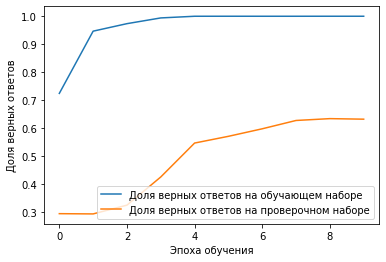

In [ ]:

modelE = Sequential()
modelE.add(Embedding(maxWordCount, 50, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.2))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=10,
                    batch_size=128,
                    validation_data=(xTest, yTest))


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### j. 200 Embedding

Epoch 1/10
138/138 [==============================] - 28s 206ms/step - loss: 0.8992 - accuracy: 0.7478 - val_loss: 3.0471 - val_accuracy: 0.2929
Epoch 2/10
138/138 [==============================] - 28s 203ms/step - loss: 0.3013 - accuracy: 0.8891 - val_loss: 2.7105 - val_accuracy: 0.2931
Epoch 3/10
138/138 [==============================] - 28s 202ms/step - loss: 0.1764 - accuracy: 0.8793 - val_loss: 2.0165 - val_accuracy: 0.3578
Epoch 4/10
138/138 [==============================] - 28s 204ms/step - loss: 0.1654 - accuracy: 0.8764 - val_loss: 1.6167 - val_accuracy: 0.4789
Epoch 5/10
138/138 [==============================] - 28s 202ms/step - loss: 0.1383 - accuracy: 0.8793 - val_loss: 1.4463 - val_accuracy: 0.5408
Epoch 6/10
138/138 [==============================] - 28s 202ms/step - loss: 0.0883 - accuracy: 0.9414 - val_loss: 1.6294 - val_accuracy: 0.5787
Epoch 7/10
138/138 [==============================] - 28s 202ms/step - loss: 0.0099 - accuracy: 0.9989 - val_loss: 1.0076 - val_ac

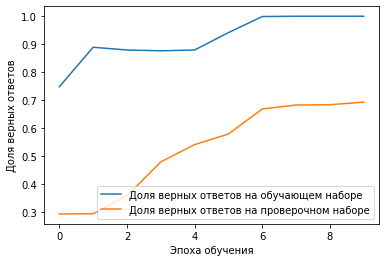

In [ ]:

modelE = Sequential()
modelE.add(Embedding(maxWordCount, 200, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.2))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='sigmoid'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=10,
                    batch_size=128,
                    validation_data=(xTest, yTest))


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Pro Вар1

In [ ]:
def readText(fileName):
  f = open(fileName, 'r')
  text = f.read()
  text = text.replace('\n', ' ')
  return text
className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдберри"]
nClasses = len(className)

In [ ]:
trainText = []
testText = []

for i in className:
  for j in os.listdir('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/'):
    if i in j:
      if 'Обучающая' in j:
        trainText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/'+j))
        print(j, 'добавлен в обучающую выборку')
      if 'Тестовая' in j:
        testText.append(readText('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Писатели/'+j))
        print(j, 'добавлен в тестовую выборку')


(О. Генри) Обучающая_50 вместе.txt добавлен в обучающую выборку
(О. Генри) Тестовая_20 вместе.txt добавлен в тестовую выборку
(Стругацкие) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Стругацкие) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Булгаков) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Булгаков) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Клиффорд_Саймак) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Клиффорд_Саймак) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Макс Фрай) Тестовая_2 вместе.txt добавлен в тестовую выборку
(Макс Фрай) Обучающая_5 вместе.txt добавлен в обучающую выборку
(Рэй Брэдберри) Обучающая_22 вместе.txt добавлен в обучающую выборку
(Рэй Брэдберри) Тестовая_8 вместе.txt добавлен в тестовую выборку


In [ ]:
def getSetFromIndexes(wordIndexes, xLen, step):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0
  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index +=step
  return xSample
  
def createSetMultiClasses(wordIndexes, xLen, step):
  nClasses = len(wordIndexes)
  classesXSamples = []
  for wI in wordIndexes:
    classesXSamples.append(getSetFromIndexes(wI, xLen, step))
  
  xSamples = []
  ySamples = []

  for t in range(nClasses):
    xT = classesXSamples[t]
    for i in range(len(xT)):
      xSamples.append(xT[i])
      ySamples.append(utils.to_categorical(t, nClasses))

  xSamples = np.array(xSamples)
  ySamples = np.array(ySamples)

  return (xSamples, ySamples)

In [ ]:

maxWordCount = 25000
tokenizer = Tokenizer(num_words=maxWordCount, lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(trainText)
trainWordIndexes = tokenizer.texts_to_sequences(trainText)
testWordIndexes = tokenizer.texts_to_sequences(testText)
xLen = 3000
step = 130

xTrain, yTrain = createSetMultiClasses(trainWordIndexes, xLen, step)
xTest, yTest = createSetMultiClasses(testWordIndexes, xLen, step)
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())


In [ ]:

model01 = Sequential()
model01.add(BatchNormalization(input_shape=(maxWordCount,)))
model01.add(Dense(175, activation='sigmoid'))
model01.add(Dropout(0.3))
model01.add(Dense(6, activation='sigmoid'))

model01.compile(optimizer=Adam(learning_rate=0.0001), loss='mae', metrics=['accuracy'])

history = model01.fit(xTrain01, yTrain,
                      epochs=10,
                      batch_size=64,
                      validation_data=(xTest01, yTest))


Epoch 1/10
220/220 [==============================] - 2s 10ms/step - loss: 0.1596 - accuracy: 0.9547 - val_loss: 0.1500 - val_accuracy: 0.9224
Epoch 2/10
220/220 [==============================] - 2s 7ms/step - loss: 0.0382 - accuracy: 1.0000 - val_loss: 0.0942 - val_accuracy: 0.9675
Epoch 3/10
220/220 [==============================] - 2s 7ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9702
Epoch 4/10
220/220 [==============================] - 2s 7ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9692
Epoch 5/10
220/220 [==============================] - 2s 7ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.0676 - val_accuracy: 0.9692
Epoch 6/10
220/220 [==============================] - 2s 7ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0640 - val_accuracy: 0.9708
Epoch 7/10
220/220 [==============================] - 2s 7ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0606 - val_accuracy: 0.9702
Epoch

In [ ]:
model01.save('/content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Saved model writers')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/17 Обработка текстов/Saved model writers/assets


In [ ]:
# Представляем тестовую выборку в удобных для распознавания размерах
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #Задаем количество классов
  xTest6Classes01 = []               #Здесь будет список из всех классов, каждый размером "кол-во окон в тексте * 20000 (при maxWordsCount=20000)"
  xTest6Classes = []                 #Здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #Для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #Тестовая выборка размером "кол-во окон*длину окна"(например, 420*1000)
    xTest6Classes.append(sample)              # Добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #Трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #И добавляется к нашему списку, 
  xTest6Classes = np.array(xTest6Classes)                     #И добавляется к нашему списку, 
  
  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBag 6 классов на n*20000 и xTestEm 6 по n*1000

# Распознаём тестовую выборку и выводим результаты
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  totalSumRec = 0 # Сумма всех правильных ответов
  
  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)

    evVal = []
    for j in range(nClasses):
      evVal.append(len(currOut[currOut==j])/len(xTest[i]))

    totalSumRec += len(currOut[currOut==i])
    recognizedClass = np.argmax(evVal) #Определяем, какой класс в итоге за какой был распознан
    
    #Выводим результаты распознавания по текущему классу
    isRecognized = "Это НЕПРАВИЛЬНЫЙ ответ!"
    if (recognizedClass == i):
      isRecognized = "Это ПРАВИЛЬНЫЙ ответ!"
    str1 = 'Класс: ' + className[i] + " " * (11 - len(className[i])) + str(int(100*evVal[i])) + "% сеть отнесла к классу " + className[recognizedClass]
    print(str1, " " * (55-len(str1)), isRecognized, sep='')
  
  #Выводим средний процент распознавания по всем классам вместе
  print()
  sumCount = 0
  for i in range(nClasses):
    sumCount += len(xTest[i])
  print("Средний процент распознавания ", int(100*totalSumRec/sumCount), "%", sep='')

  print()
  
  return totalSumRec/sumCount

In [ ]:
xTest6Classes01, x2 = createTestMultiClasses(testWordIndexes, xLen, step) #Преобразование тестовой выборки

In [ ]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

Класс: О. Генри   100% сеть отнесла к классу О. Генри  Это ПРАВИЛЬНЫЙ ответ!
Класс: Стругацкие 93% сеть отнесла к классу Стругацкие Это ПРАВИЛЬНЫЙ ответ!
Класс: Булгаков   98% сеть отнесла к классу Булгаков   Это ПРАВИЛЬНЫЙ ответ!
Класс: Саймак    100% сеть отнесла к классу Саймак   Это ПРАВИЛЬНЫЙ ответ!
Класс: Фрай      94% сеть отнесла к классу Фрай      Это ПРАВИЛЬНЫЙ ответ!
Класс: Брэдберри  100% сеть отнесла к классу Брэдберри Это ПРАВИЛЬНЫЙ ответ!

Средний процент распознавания 97%

